# Balance Data:

#### - Check if the data is balanced or not:

In [16]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Dataset/Preprocessed_dataset.csv')

# Access the 'outcome' column
outcomes = data['outcome']

# Count occurrences of each outcome
num_home_wins = outcomes[outcomes == 2].count()
num_away_wins = outcomes[outcomes == 0].count()
num_draws = outcomes[outcomes == 1].count()

# Calculate the total number of entries
total = num_home_wins + num_away_wins + num_draws

# Calculate the percentage of each outcome
percentage_home_wins = (num_home_wins / total) * 100
percentage_away_wins = (num_away_wins / total) * 100
percentage_draws = (num_draws / total) * 100

# Print the counts and percentages
print("Number of Home Wins:", num_home_wins)
print("Number of Away Wins:", num_away_wins)
print("Number of Draws:", num_draws)
print("_")
print("Percentage of Home Wins: {:.2f}%".format(percentage_home_wins))
print("Percentage of Away Wins: {:.2f}%".format(percentage_away_wins))
print("Percentage of Draws: {:.2f}%".format(percentage_draws))

Number of Home Wins: 429
Number of Away Wins: 302
Number of Draws: 169
_
Percentage of Home Wins: 47.67%
Percentage of Away Wins: 33.56%
Percentage of Draws: 18.78%


#### -Import libraries

In [26]:
import warnings
warnings.filterwarnings("ignore")
%pip install imbalanced.learn
%pip install kneed


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### - Process of correcting data balancing:

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('Dataset/Preprocessed_dataset.csv')

encoder = LabelEncoder()

df['Binary_outcome'] = df['outcome'].apply(lambda x: 1 if x in [1, 2] else 0)

X = df.drop('Binary_outcome', axis=1)
y = df['Binary_outcome']

# Oversample the "Low" class using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled X and y into a single DataFrame
df = pd.DataFrame(X_resampled, columns=X.columns)
df['outcome'] = y_resampled

# Print the new distribution of the target variable
print(pd.Series(y_resampled).value_counts())

# dave the processed dataset into hard drive
df.to_csv('Dataset/Balanced_dataset.csv', index=False)

Binary_outcome
1    598
0    598
Name: count, dtype: int64


#### - Data after the balancing process:

In [22]:
import pandas as pd

# Assuming 'resampled_df' contains the balanced dataset with the 'Binary_outcome' column
# Load the balanced dataset if needed
resampled_df = pd.read_csv('Dataset/Balanced_dataset.csv')

# Calculate the distribution of the target variable
distribution = resampled_df['Binary_outcome'].value_counts()

# Calculate total number of instances in the balanced dataset
total_resampled = distribution.sum()

# Calculate percentages
percentage_1 = (distribution[1] / total_resampled) * 100  # Percentage of Home wins + Draws
percentage_0 = (distribution[0] / total_resampled) * 100  # Percentage of Away wins

# Print the percentages
print("Percentage of Home wins and Draws combined: {:.2f}%".format(percentage_1))
print("Percentage of Away wins: {:.2f}%".format(percentage_0))

KeyError: 'Binary_outcome'

# Loading data:

In [5]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
df = pd.read_csv('Dataset/Balanced_dataset.csv');
print(df)

          year   country      city     stage  home_team  away_team  \
0    -2.459894  1.997431  0.125045 -1.499020  -0.344156  -0.044394   
1    -2.459894  1.997431  0.125045 -0.977857  -1.229472   1.354630   
2    -2.459894  1.997431  0.125045 -1.325299  -1.108747   1.519221   
3    -2.459894  1.997431  0.125045 -1.151578   0.661886   0.531675   
4    -2.459894  1.997431  0.125045 -1.499020  -1.350197  -0.661610   
...        ...       ...       ...       ...        ...        ...   
1191  1.251521  0.470278  1.094545 -0.201649  -1.053113   0.257656   
1192  1.343471  0.409968  0.942601  0.127069   0.246425  -1.482721   
1193 -1.146091 -1.109517 -1.621872 -1.182908   1.314612   1.262508   
1194 -0.387812  1.111518  1.419434 -1.216562   1.469905  -1.238269   
1195  0.997711  0.636749 -0.505937 -1.751025   0.349056   0.984300   

      home_score  away_score   outcome  win_conditions  ...  \
0       1.851429   -0.195078  0.964916        0.240557  ...   
1      -1.138766    1.445764 -1.2

# Feature Selection:

In [6]:
fn= df.keys().tolist()[:-1]
X= df[fn]
y=df['outcome']
X



,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,...,Year_Decade_1950s,Year_Decade_1960s,Year_Decade_1970s,Year_Decade_1980s,Year_Decade_1990s,Year_Decade_2000s,Year_Decade_2010s,Month_July,Month_June,Month_May
0,-2.459894,1.997431,0.125045,-1.499020,-0.344156,-0.044394,1.851429,-0.195078,0.964916,0.240557,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,1.0,0.0,0.0
1,-2.459894,1.997431,0.125045,-0.977857,-1.229472,1.354630,-1.138766,1.445764,-1.281977,0.240557,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,1.0,0.0,0.0
2,-2.459894,1.997431,0.125045,-1.325299,-1.108747,1.519221,-0.391217,0.625343,-1.281977,0.240557,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,1.0,0.0,0.0
3,-2.459894,1.997431,0.125045,-1.151578,0.661886,0.531675,-0.391217,1.445764,-1.281977,0.240557,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,1.0,0.0,0.0
4,-2.459894,1.997431,0.125045,-1.499020,-1.350197,-0.661610,-0.391217,-1.015499,0.964916,0.240557,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1.251521,0.470278,1.094545,-0.201649,-1.053113,0.257656,-1.138766,0.625343,-1.281977,0.240557,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,1.0,0.0,1.0,0.0
1192,1.343471,0.409968,0.942601,0.127069,0.246425,-1.482721,-0.391217,0.625343,-1.281977,0.240557,...,0.000000,0.0,0.0,0.0,0.00000,0.000000,1.0,0.0,1.0,0.0
1193,-1.146091,-1.109517,-1.621872,-1.182908,1.314612,1.262508,-1.138766,1.232496,-1.281977,0.240557,...,0.740050,0.0,0.0,0.0,0.25995,0.000000,0.0,0.0,1.0,0.0
1194,-0.387812,1.111518,1.419434,-1.216562,1.469905,-1.238269,0.017512,1.971061,-1.281977,0.240557,...,0.546759,0.0,0.0,0.0,0.00000,0.453241,0.0,0.0,1.0,0.0


# Data Mining Technique

## Classification:

### Information Gain (entropy):

The model is trained utilizing the information gain(entropy), and the dataset is divided into 70% training and 30% testing subsets.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)


ValueError: could not convert string to float: 'H'

### confusion matrix:

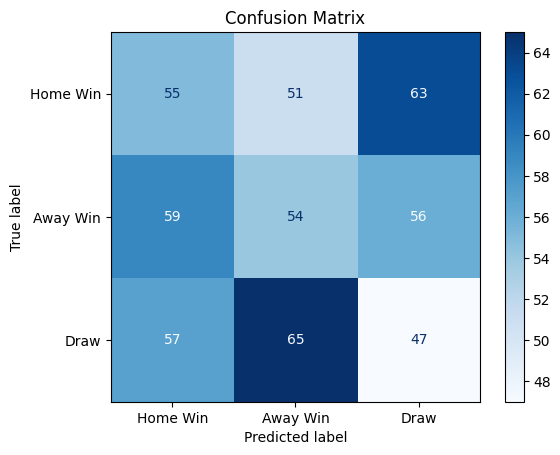

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred, labels=['H', 'A', 'D'])

# Define class labels
class_labels = {'H': 'Home Win', 'A': 'Away Win', 'D': 'Draw'}

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels['H'], class_labels['A'], class_labels['D']])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

